In [1]:
import matplotlib
import matplotlib.pyplot as plt
import urllib.request
import numpy as np
import math
import peakutils
import math
import time,os,sys
import datetime
import matplotlib.dates as mdates
from os import listdir
from os.path import isfile, join
import numpy.ma as ma
import sunpy
import sunpy.map
from sunpy.timeseries import TimeSeries
from sunpy.time import TimeRange, parse_time
from sunpy.net import hek, Fido, attrs as a
import astropy.units as u
from astropy.coordinates import SkyCoord
import pickle
import warnings
from scipy import stats
import copy
import imageio

import pandas as pd
import seaborn as sns
import matplotlib.animation as animation
%matplotlib notebook

In [2]:
Ne = np.load('Ne_v6.npy')
Ne[Ne<=0]=np.nan
times = np.load('times_v6.npy')

Ne_log10 = np.array([np.log10(ne) for ne in Ne])

Ne_min = np.nanmin(Ne_log10)
Ne_max = np.nanmax(Ne_log10)
levels = np.linspace(Ne_min,Ne_max,70)
print(Ne_min,Ne_max)

tiempos = np.array([datetime.datetime.strftime(t,'%Y-%m-%d %H:%M:%S') for t in times])

15.908852022741966 22.85271323006321


/Users/juancg/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:2: RuntimeWarning: invalid value encountered in less_equal
  


0
0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85
86
87
88
89
0


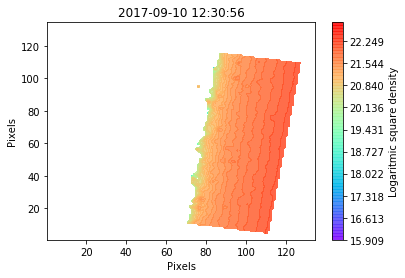

In [6]:
Writer = animation.writers['ffmpeg']
writer = Writer(fps=4, metadata=dict(artist='Me'), bitrate=9000)

fig,ax = plt.subplots()

def animate(i):
    ax.clear()
    im = ax.contourf(Ne_log10[i,:,:],levels, alpha=0.85, cmap=plt.cm.rainbow, origin='lower')
    ax.set_title('%s'%(tiempos[i]))
    ax.set_xlabel(r'Pixels')
    ax.set_ylabel(r'Pixels')

cbar = plt.colorbar(ax.contourf(Ne_log10[0,:,:],levels, alpha=0.85, cmap=plt.cm.rainbow, origin='lower'))
cbar.ax.set_ylabel(r'Logaritmic square density')
# plt.tight_layout()
interval = 1#in seconds     
ani = animation.FuncAnimation(fig,animate,len(Ne_log10),interval=interval*1e+3,blit=False)
ani.save('densities.mp4', writer = writer,dpi=300)


plt.show()